<h1>Systemy inteligentne w biznesie <br>
    Projekt końcowy</h1>
    
 <h2>Wiktoria Paciuch <br>
    UFO dataset</h2>

<h3>Wprowadzenie</h3>
<h4>"I want to believe" - hasło, które przyświeca Foxowi Mulderowi w trakcie fabuły każdego z odcinków serialu Archiwum X, nie bez powodu stało się popularne na całym świecie. Zjawisko opisywane jako Unidentified Flying Object (UFO), zauważane i raportowane było w różnych rejonach kuli ziemskiej od lat, jest to fenomen, którego nie można natychmiast zidentyfikować ani wyjaśnić.<br>
    <br>
    Obiekty obserwowane na niebie, zupełnie jak "standardowe" elementy, które możemy tam zauważyć (samoloty czy ptaki), bywają czasami niekoniecznie w pełni wyraźne i jednoznaczne. Stąd, ciekawym pod kątem analizy eksploracyjnej jest wybrany zbiór - UFO dataset - który zawiera również informacje o pogodzie zaraportowanej w trakcie obserwacji zjawiska.<br>
    <br>
Jeszcze przed zerknięciem w dane, znając kontekst, mogą nasunąć się nam pewne pytania:<br>
- Gdzie najczęściej były zauważane UFO?<br>
- O której godzinie najczęściej dostrzegano obiekty?<br>
- Jaki kształt UFO był najczęściej opisywany?<br>
- Czy pora roku i warunki pogodowe mogły mieć wpływ na obserwacje?<br>
    <br>
Na te i inne pytania, powstałe w trakcie analizy postaram się znaleźć odpowiedzi.
</h4>

<h3>Potrzebne biblioteki</h3>

In [2]:
library(rworldmap)
library(ggplot2)
library(reshape2)
library(wordcloud2)
library(plyr)
library(ggridges)
library(gganimate)
library(RColorBrewer)

Warning message:
"package 'rworldmap' was built under R version 3.6.3"Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggridges' was built under R version 3.6.3"Warning message:
"package 'gganimate' was built under R version 3.6.3"

<h3>Import zbioru danych</h3>

In [3]:
ufoData = read.table(file = 'ufo.csv', sep = ',', header = TRUE)
ufoData<-as.data.frame(ufoData)

<h3>Prezentacja zaimportowanego zbioru danych - liczność zbioru, treść informacji</h3>

In [4]:
ufoData

reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome
1977-04-04T04:02:23.340Z,1977-03-31,23:46,circle,4,1,rain,Ila,Bashirian,47.32944,-122.578889,Y,N,N,explained
1982-11-22T02:06:32.019Z,1982-11-15,22:04,disk,4,1,partly cloudy,Eriberto,Runolfsson,52.66491,-1.034894,Y,Y,N,explained
1992-12-07T19:06:52.482Z,1992-12-07,19:01,circle,49,1,clear,Miller,Watsica,38.95167,-92.333889,Y,N,N,explained
2011-02-24T21:06:34.898Z,2011-02-21,20:56,disk,13,1,partly cloudy,Clifton,Bechtelar,41.49694,-71.367778,Y,N,N,explained
1991-03-09T16:18:45.501Z,1991-03-09,11:42,circle,17,1,mostly cloudy,Jayda,Ebert,47.60639,-122.330833,Y,N,N,explained
2011-08-14T23:27:37.734Z,2011-08-13,02:55,sphere,65,1,partly cloudy,Kellen,Smitham,33.91639,-118.351667,Y,N,N,explained
1991-02-06T11:02:39.883Z,1991-02-05,14:04,triangle,80,1,partly cloudy,Hilton,Purdy,33.66944,-117.822222,Y,N,N,probable
1973-01-02T11:51:04.056Z,1972-12-31,22:56,light,33,1,rain,Zita,Johns,44.71667,-75.516667,Y,N,N,unexplained
2004-12-09T08:37:11.338Z,2004-12-07,22:07,pyramid,22,1,partly cloudy,Alexane,Schneider,40.86667,-124.081667,Y,N,N,explained
1994-11-21T13:36:50.772Z,1994-11-15,17:20,disk,72,1,fog,Oswaldo,Schumm,47.13028,-119.276944,Y,N,N,explained


In [5]:
cat("Liczba rekordów w zbiorze:")
nrow(ufoData)
cat("Liczba kolumn w zbiorze:")
ncol(ufoData)

Liczba rekordów w zbiorze:

[1] 18000

Liczba kolumn w zbiorze:

[1] 15

<h4>W zbiorze UFO data znajduje się 18 tysięcy obserwacji, opisanych przez 15 atrybutów. Atrybuty opisują kolejno: datę oraz godzinę zaobserowania zjawiska, opisywany zauważony kształt, czas trwania obserwacji w sekundach, liczbę świadków, pogodę w trakcie obserwacji, imię oraz nazwisko świadka opisującego, dane geograficzne miejsca obserwacji, informację czy podczas raportowanego zdarzenia zauważono jakiekolwiek zjawiska, informację czy istnieje jakikolwiek dowód fizyczny wskazujący prawdziwość zauważonego zjawiska, informację czy świadek wszedł w jakikolwiek kontakt z UFO oraz informację o rezultacie rozpoznania prawdziwości zaraportowanego zdarzenia.</h4> 

<h3>Czyszczenie danych</h3>
<h4>W pierwszej kolejności dane zostały przeanalizowane pod kątem konieczności oczyszczenia ich. Sprawdzono występowanie duplikatów wśród kolejnych rekordów, wartości brakujące w atrybutach oraz ewentualne błędy w danych.</h4>

In [6]:
for (i in colnames(ufoData)){
  a <- round(sum(ufoData[i]=="")/nrow(ufoData)*100)
  print(i)
  print (a)}

[1] "reportedTimestamp"
[1] 0
[1] "eventDate"
[1] 0
[1] "eventTime"
[1] 0
[1] "shape"
[1] 0
[1] "duration"
[1] 0
[1] "witnesses"
[1] 0
[1] "weather"
[1] 0
[1] "firstName"
[1] 0
[1] "lastName"
[1] 0
[1] "latitude"
[1] 0
[1] "longitude"
[1] 0
[1] "sighting"
[1] 0
[1] "physicalEvidence"
[1] 0
[1] "contact"
[1] 0
[1] "researchOutcome"
[1] 0


<h4>Zauważalnie, w zbiorze danych nie zauważono brakujących wartości. Nie istnieje więc konieczność naprawy lub odsunięcia jakiegokolwiek atrybutu w ramach dalszej analizy.<br>
    <br>
Kolejno, zweryfikowano zbiór pod kątem występowania możliwych duplikatów.</h4>

In [7]:
sum(duplicated(ufoData))

[1] 0

<h4>Zauważalnie, w zbiorze UFO nie znaleziono również żadnych zduplikowanych rekordów.<br>
    <br>
 Następnie przystąpiono do analizy atrybutów pod kątem ich struktury.</h4>

In [8]:
str(ufoData)

'data.frame':	18000 obs. of  15 variables:
 $ reportedTimestamp: Factor w/ 18000 levels "1970-01-01T12:20:15.870Z",..: 2678 4686 8327 14992 7663 15159 7632 1124 12686 9070 ...
 $ eventDate        : Factor w/ 11355 levels "1969-12-31","1970-01-01",..: 1704 2977 5284 9489 4883 9588 4860 715 8026 5742 ...
 $ eventTime        : Factor w/ 1440 levels "00:00","00:01",..: 1427 1325 1142 1257 703 176 845 1377 1328 1041 ...
 $ shape            : Factor w/ 10 levels "","box","circle",..: 3 4 3 4 3 8 10 5 7 4 ...
 $ duration         : int  4 4 49 13 17 65 80 33 22 72 ...
 $ witnesses        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ weather          : Factor w/ 7 levels "clear","fog",..: 5 4 1 4 3 4 4 5 4 2 ...
 $ firstName        : Factor w/ 2995 levels "Aaliyah","Aaron",..: 1324 975 2155 591 1440 1681 1291 2988 99 2344 ...
 $ lastName         : Factor w/ 474 levels "Abbott","Abernathy",..: 18 364 443 25 100 398 335 198 382 388 ...
 $ latitude         : num  47.3 52.7 39 41.5 47.6 ...
 $ longitude       

In [9]:
summary(ufoData)

                reportedTimestamp      eventDate       eventTime    
 1970-01-01T12:20:15.870Z:    1   1973-03-02:    7   07:17  :   25  
 1970-01-06T01:04:31.865Z:    1   1990-10-11:    7   01:37  :   24  
 1970-01-06T16:30:33.922Z:    1   1995-02-23:    7   12:06  :   24  
 1970-01-07T18:29:56.788Z:    1   1970-06-24:    6   18:30  :   23  
 1970-01-07T19:27:25.549Z:    1   1972-05-14:    6   20:29  :   23  
 1970-01-08T14:36:28.987Z:    1   1972-06-08:    6   00:02  :   22  
 (Other)                 :17994   (Other)   :17961   (Other):17859  
      shape         duration        witnesses               weather    
 circle  :6047   Min.   :  1.00   Min.   : 1.000   clear        :3206  
 disk    :5920   1st Qu.: 26.00   1st Qu.: 3.000   fog          :2123  
 light   :1699   Median : 51.00   Median : 5.000   mostly cloudy:3079  
 square  :1662   Mean   : 50.52   Mean   : 5.513   partly cloudy:2704  
 triangle:1062   3rd Qu.: 75.00   3rd Qu.: 8.000   rain         :2605  
 sphere  :1020  

<h4>Brak konieczności dokonywania konwersji typów.<br>
    <br>
    Możemy przystąpić więc do właściwej analizy eksploracyjnej zbioru UFO.</h4>

<h3>Analiza eksploracyjna zbioru</h3>
<h4>W pierwszym etapie, intresujące atrybuty zostaną przeanalizowane pod kątem trendu w nich występującego. Nastąpi również próba dostrzeżenia pewnych zależności oraz zauważenia korelacji między wartościami atrybutu, w celu wyciągnięcia dodatkowych informacji ze zbioru.<br>
<br>
W pierwszej kolejności spróbujemy odpowiedzieć na pytanie gdzie najczęściej widywane było UFO. W tym celu wygenerowana została mapa, z naniesieniem punktów wygenerowanych za pomocą wartości dwóch atrybutów: "latitude", określającym szerokość geograficzną wsystąpienia opisanego zjawiska, oraz "longtitude", opisującym długość geograficzną tego miejsca.</h4>


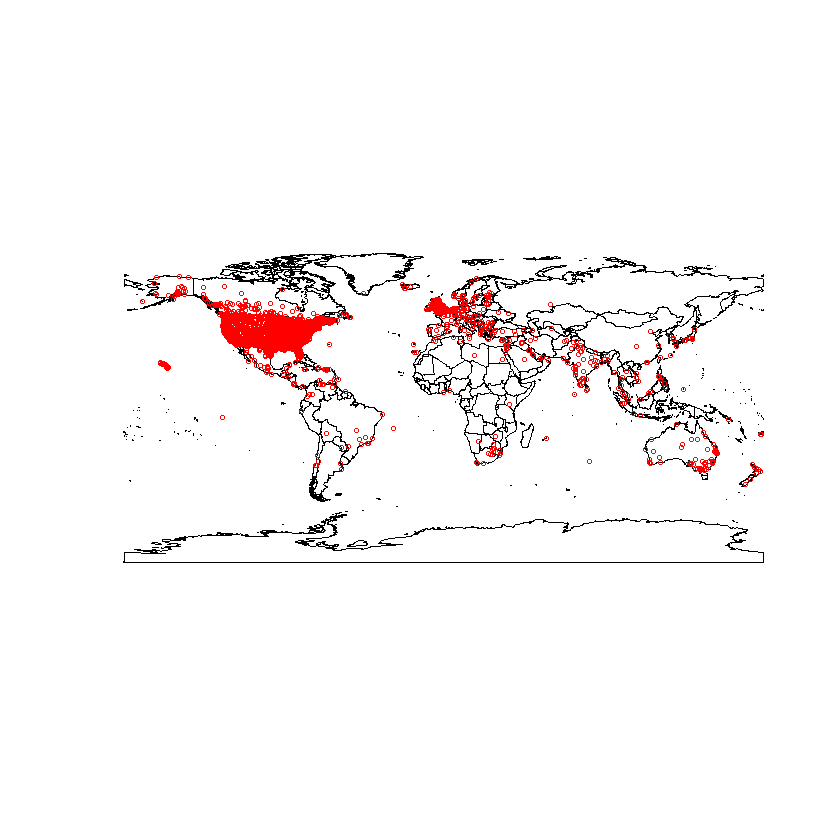

In [10]:
newmap <- getMap(resolution = "low")
plot(newmap)
points(ufoData$longitude, ufoData$latitude, col = "red", cex = .6)

<h4>Zdecydowanym liderem wśród państw raportujących zdarzenia UFO są Stany Zjednoczone oraz Wielka Brytania. Zjawiska zauważane były na każdym kontynencie z pominięciem Antarktydy, jednak nawet wśród państw europejskich znaczące zagęszczenie punktów geograficznych zajmuje UK.<br>
Warto zastanowić się nad kontekstowością tego zjawiska. Być może jest to spowodowane w pewnej mierze raptownym rozwojem kultury masowej i popularnej, w tym rozpowszechnionej literatury anglojęzycznej, podejmującej tematykę zjawisk paranormalnych.<br>
<br>
A czy w Polsce zgłaszane były jakieś zdarzenia obserwacji UFO? Przyjrzyjmy się mapie Europy z bliska.</h4>

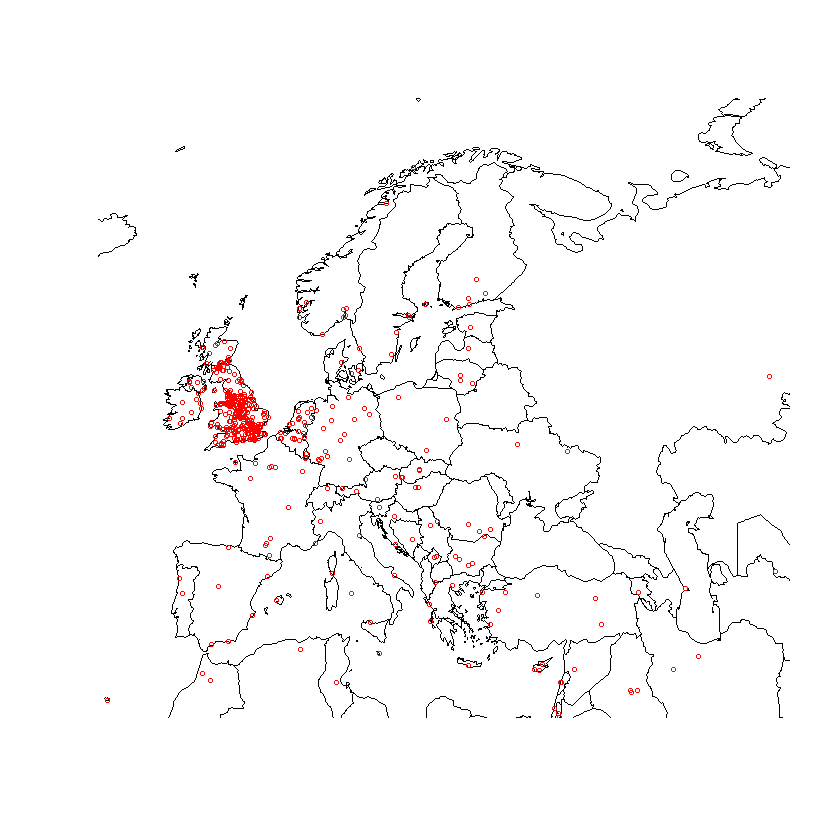

In [11]:
plot(newmap,
xlim = c(-15, 59),
ylim = c(35, 71),
)

points(ufoData$longitude, ufoData$latitude, col = "red", cex = .6)

<h4>Niewątpliwie, wedle danych ze zbioru, trzy zjawiska zauważenia UFO zostały zaraportowane na terenie Polski. Jeden z wygnerowanych punktów, wysunięty najbardziej na wschód kraju możemy powiązać z najbardziej popularnym polskim fenomenem UFO - opisywanym w mediach zjawiskiem zaobserowanym w Emilcinie w dniu 10 maja 1978. Sprawdźmy w takim razie, czy rzeczywiście w zbiorze istnieje zdarzenie udokumentowane na datę tamtego dnia.</h4>

In [12]:
ufoData[which(ufoData$eventDate == "1978-05-10"), ]

reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome


<h4>Brak rekordów dotyczących wspomnianego wydarzenia w zaimportowanym zbiorze danych.<br>
<br>
Informacje o datach zaraportowanych wydarzeń mogą być rozważane w kontekście pytania: w których latach najczęściej widywano UFO?<br>
(Z powodów problematycznych dla Jupytera, animowany gif zostanie renderowany lokalnie, nie w notatniku)</h4>

In [19]:
years = lapply(ufoData$eventDate,substring, first=1, last=4)
years = strtoi(years)
years = sort(years)

ufoData$years <- years

yearFreq = count(ufoData$years)

group <- yearFreq$x
values <- yearFreq$freq

a <- data.frame(group, values=values/10, frame=rep('a',3))
b <- data.frame(group, values, frame=rep('b',3))
data <- rbind(a,b)  

plot <- ggplot(data, aes(x=group, y=values, fill=group)) + 
  geom_bar(stat='identity') +
  theme_bw() +
  transition_states(
    frame,
    transition_length = 2,
    state_length = 1
  ) +
  ease_aes('sine-in-out') 

anim_save("animatedChart.gif", plot)

<h4>Według zbioru danych, liczność zauważania zjawisk UFO w kontekście lat, w których wystąpiło zaraportowanie, jest stosunkowo wyrównana. Zauważalnie najmniejsza liczba zgłaszanych zjawisk wystąpiła w 1969 roku, oraz kolejno, choć w znacznie więszej liczbie, w roku 2019. Najwięcej zjawisk zanotowano, w kontraście do poprzdniego roku, w roku 1970.<br>
<br>
 Jeżeli rozkład obserwacji jest stosunkowo wyrównany w kontekście lat, warto sprawdzić czy sezonowość w jakikolwiek sposób może wpływać na zauważalność zjawisk UFO.<br>
Do wykresu słupkowego dobrano odpowiednią paletę kolorystyczną.
</h4>

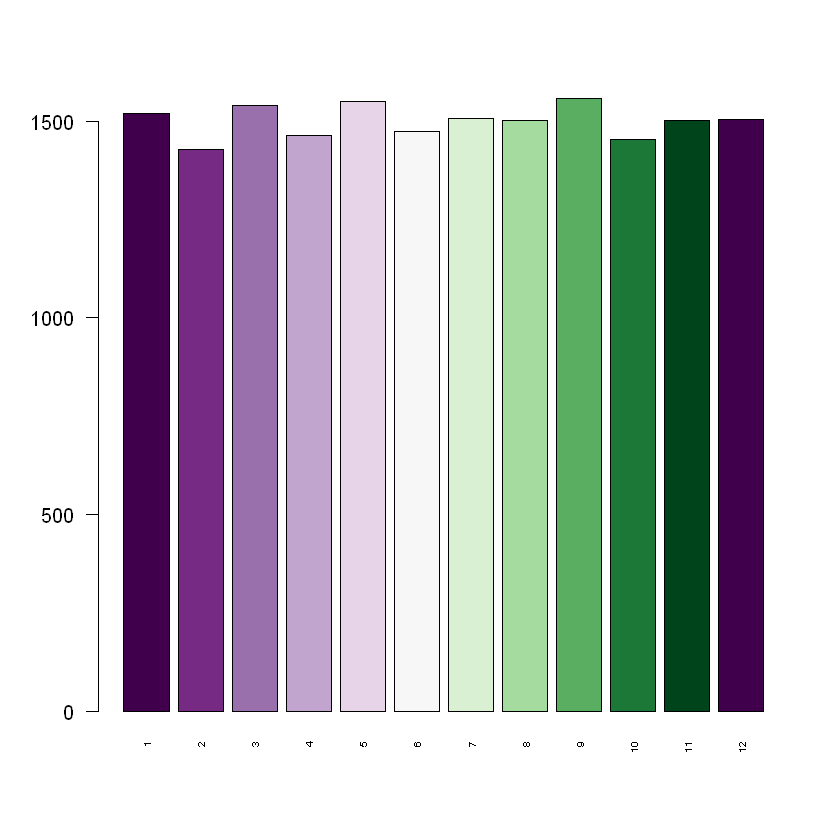

In [13]:
months = lapply(ufoData$eventDate,substring, first=6, last=7)
months = strtoi(months, base=10L)
months = sort(months)

palette <- brewer.pal(11, "PRGn") 

barplot(table(months), las=2, cex.names=.5, col = palette)

<h4>Zauważalnie, również sezonowość dostrzegania zjawisk UFO nie jest zbyt zróżnicowana. Na wykresie można dostrzec pewną przemienność w liczności raportowanych zdarzeń: rozpoczynając od stycznia jest ich więcej niż w lutym, co kolejno zmienia się w marcu i tak dalej... Można to łatwo wyjaśnić - miesiące naprzemiennie mają więcej i mniej dni, prawdopodobnie w tym przypadku dokładnie taka zależność zachodzi.<br>
    <br>
    Kolejną informacją zawartą w zbiorze danych jest kształt obserwowanego zjawiska, określony przez świadków zdarzenia. Informacje o kształcie zawiera kolumna "shape". Jaki kształt był w takim razie najczęściej obserwowanym?</h4>

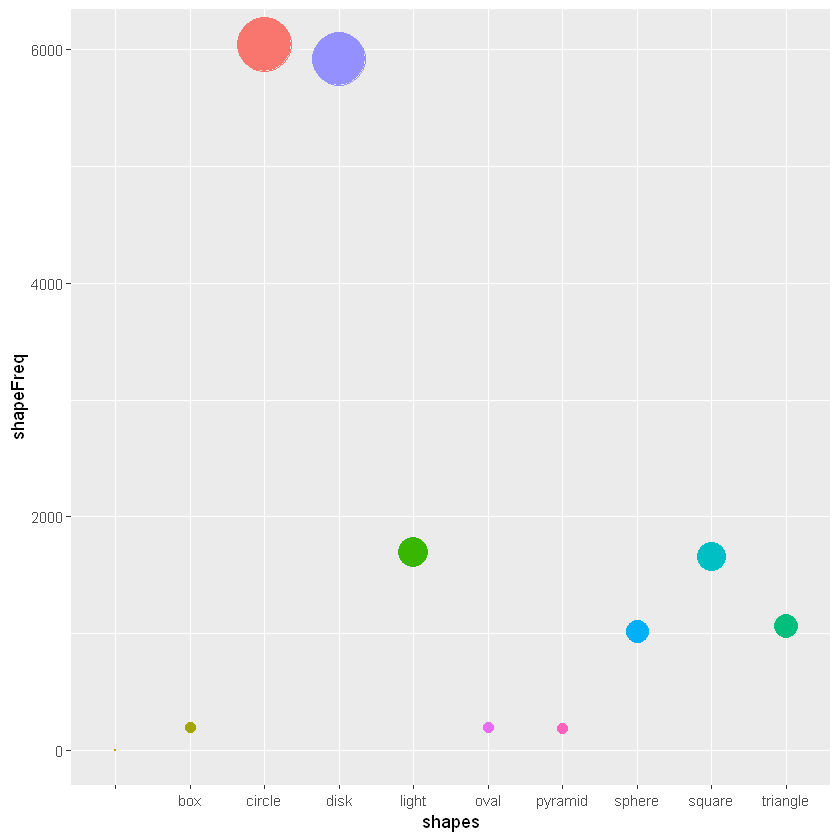

In [14]:
shapes = count(ufoData$shape)
colors <- c("#005F73", "#0A9396", "#001219", "#E9C46A", "#94D2BD", "#E9D8A6", "#EE9B00", "#CA6702", "#BB3E03", "#AE2012")
ufoData$colors <- colors
ufoData$shapes <- shapes$x
ufoData$shapeFreq <- shapes$freq

ggplot(ufoData, aes(x=shapes, y=shapeFreq, size = shapeFreq, color = colors)) +
  geom_point(alpha=0.9, show.legend = FALSE) +
  scale_size(range = c(.1, 15), guide = FALSE)

<h4>Zauważalnie, UFO w zaobserwowanych przypadkach najcześciej przybierało kszałt okrągły lub w formie dysku. Kolejno, choć ponad trzykrotnie razy mniej, obserwowano wyłącznie zjawisko określane jako światło oraz formę kwadratową.<br>
    <br>
    Warto sprawdzić czy pogoda mogła mieć jakikolwiek wpływ na różnorodność obserwowanych kształtów. W pierwszej kolejności sprawdzona zostanie liczność zauważanych zjawisk zależnie od warunków atmosferycznych.</h4>

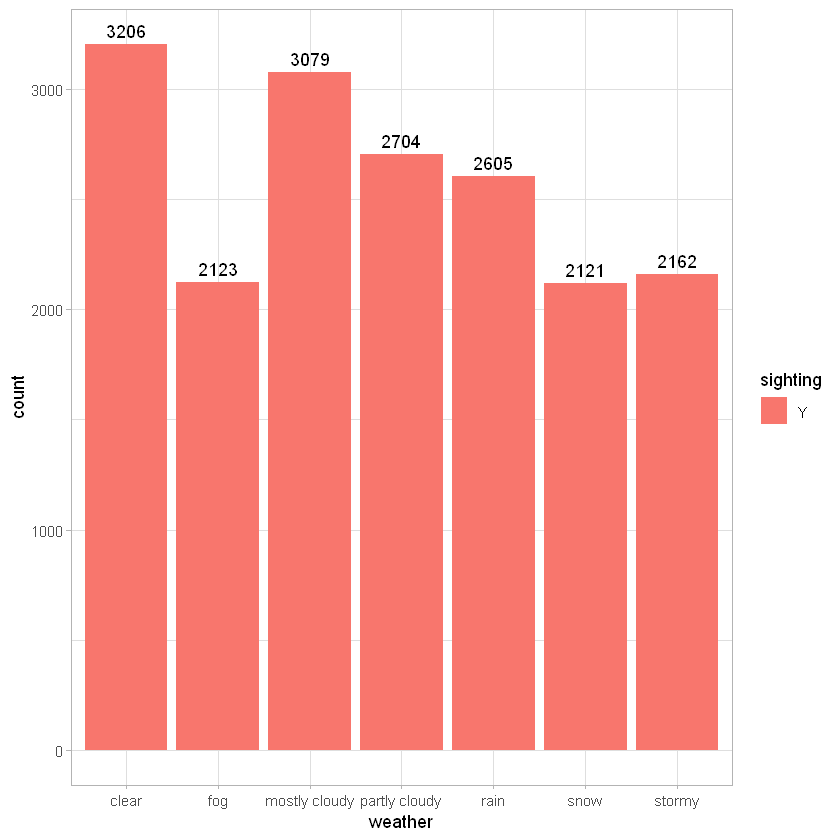

In [15]:
ggplot(ufoData, aes(x = weather, fill=sighting)) +
         geom_bar(position = 'dodge') +
         geom_text(stat='count', 
                   aes(label=stat(count)), 
                   position = position_dodge(width=1), vjust=-0.5)+
         theme_light()

<h4>Zjawiska UFO dostrzegane były głównie podczas czystej, przejrzystej pogody, w której brak jakichkolwiek zakłóceń oraz podczas dni mocno pochmurnych. Najrzadziej UFO obserwowano podczas mgły i śniegu.<br>
    <br>
    Dla podanych liczebności zweryfikowano które z kształtów były widoczne w danych warunkach pogodowych.</h4>

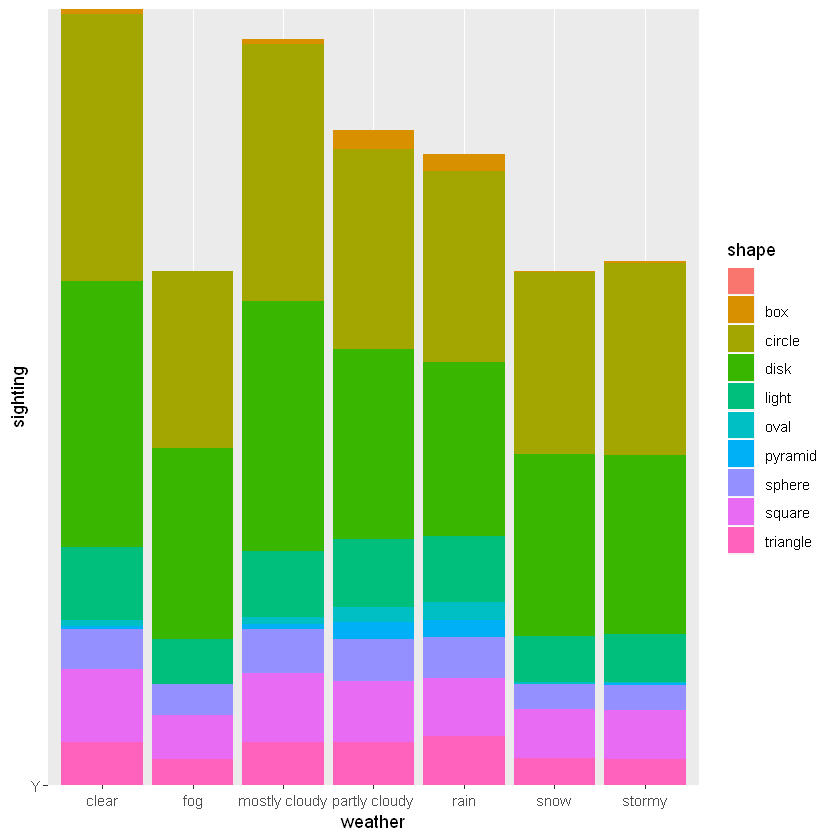

In [16]:
ggplot(data=ufoData, aes(x=weather, y=sighting, fill=shape)) + geom_bar(stat="identity")

<h4>Rozkład różnorodności obserwowanych kształtów w kontekście pogodowym jest dość równomierny.<br>
    <br>
    Co ciekawe, w parze ze zmniejszoną liczebnością zauważania UFO w warunkach mgły oraz śniegu, również w tych przypadkach nie zauważano kształtu piramidy - obserwowany był wyłącznie w innych warunkach pogodowych.<br>
<br>
Warto przeanalizować również atrybut "researchOutcome", określający rezultat rozpoznania prawdziwości zaraportowanego zdarzenia. Istnieją trzy wartości atrybutu, opisujące trzy różne możliwości rozpoznania: wyjaśnione(zjawisko zostało uznane za nieprawdziwe), prawdopodobne(zjawisko nie zostało jednoznacznie wyjaśnione, istnieją różne przesłanki wedle których zjawisko mogło być prawdziwe) oraz niewyjaśnione(nie istnieją przesłanki, według których zjawisko można uznać za nieprawdziwe).<br>
<br>
Sprawdzimy zatem, czy istnieją jakiekolwiek zależności w zbiorze danych, dzięki którym można określić zjawisko UFO jako najprawdopodobniej wyjaśnione lub niewyjaśnione.</h4>

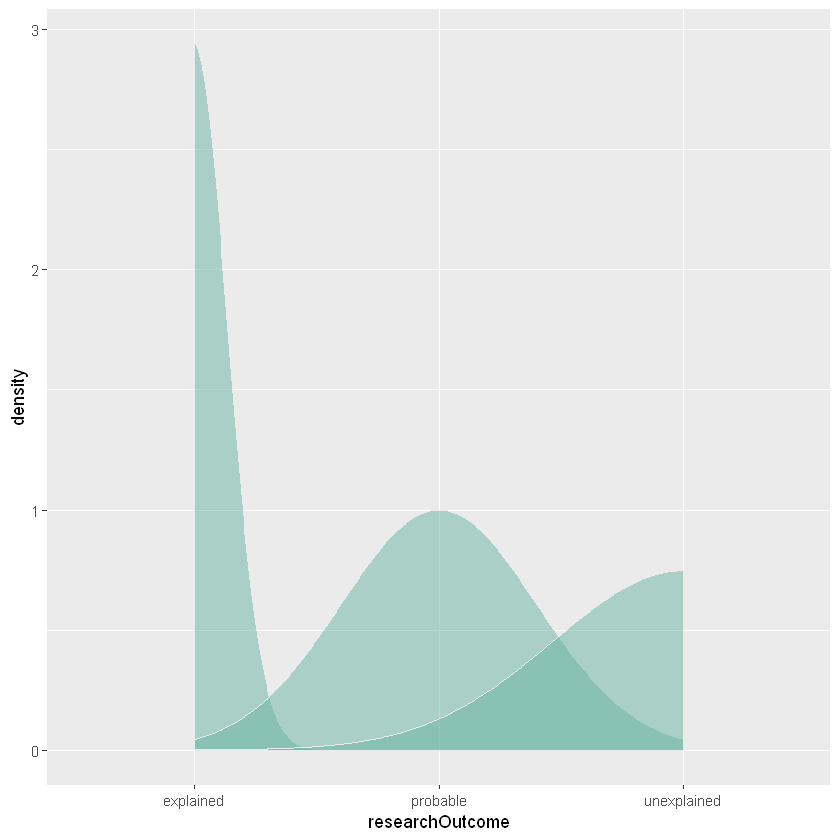

In [17]:
ggplot(ufoData, aes(researchOutcome)) +
  geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.5)

<h4>Rozkład wskazuje, że najcześciej zjawiska UFO zostawały wyjaśnione, najrzadziej (choć wcale nie rzadko) brakowało przesłanek by uznać zjawisko za wyjaśnione. Podobnie często zdarzały się obserwacje, w których pewne przesłanki okazywały się być prawdziwe.</h4>

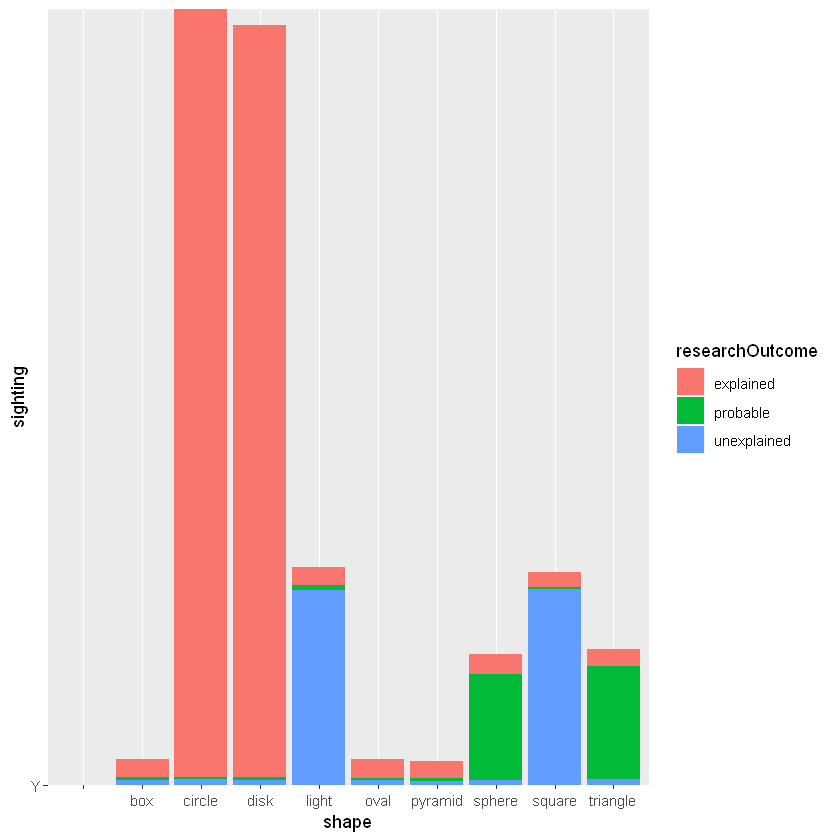

In [18]:
ggplot(data=ufoData, aes(x=shape, y=sighting, fill=researchOutcome)) + geom_bar(stat="identity")

<h4>Interesująca zależność została zaobserwowana w zbiorze - zjawiska obserwowane jako kształt okrągły lub dysk praktycznie zawsze były wyjaśniane (uznawane za nieprawdziwe), przy czym zjawska w formie światła lub kwadratu zupełnie odwrotnie (mimo, ż są kolejne w liczebności zauważanych UFO).<br>
    <br>
    Kolejno, prześledzono zależność między liczbą świadków, a wyjaśnieniem zjawiska. Kontynuowano ten sam styl kolorystyczny, w celu zachowania spójności wizualnej przedstawianych danych.</h4>

Picking joint bandwidth of 0.484


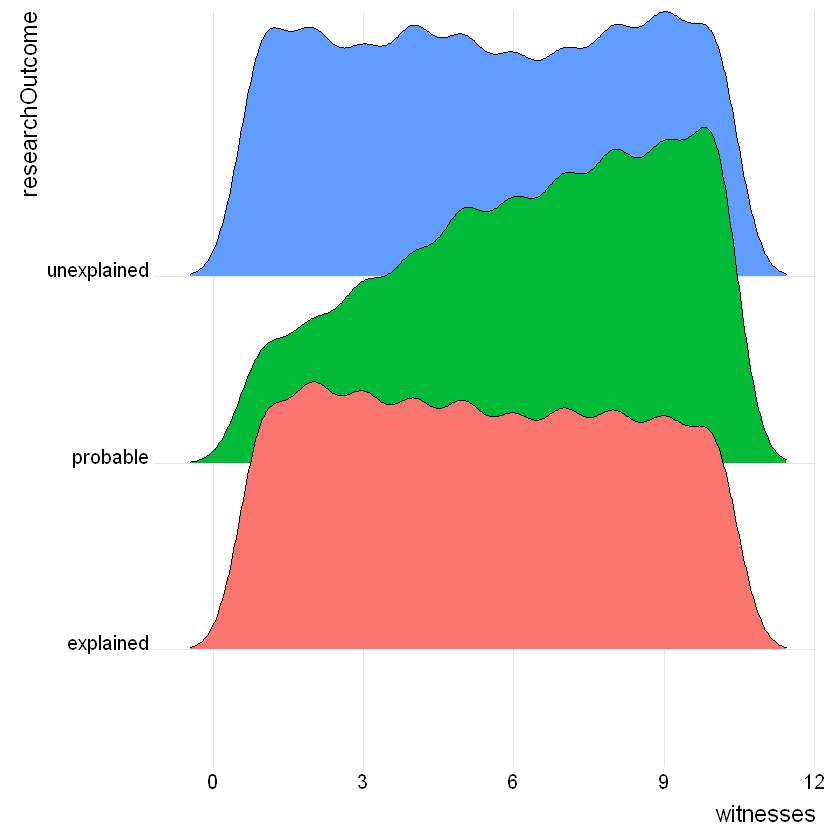

In [19]:
ggplot(ufoData, aes(x = witnesses, y = researchOutcome, fill = researchOutcome)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none")

<h4>Zauważalnie, zjawisko miało cechy niewyjaśnionego(zarówno dla wartości "probable" jak i "unexplained") częściej, jeżeli świadków zjawiska było więcej - co mogłoby zostać zrozumiane jako "im więcej osób widziało, tym prędzej jest to prawdziwe".</h4>

<h4>Finalnie, zdecydowano się na drobną ciekawostkę - osoby o jakich imionach najczęściej raportowały zjawiska UFO?<br>
<br>
Forma interaktywnego wordcharta pozwoli prześledzić liczby kryjące się za wyświetlonymi imionami.</h4>

In [20]:
names = count(ufoData$firstName)
wordcloud2(names, size = 2.3)

HTML widgets cannot be represented in plain text (need html)

<h4>Dwa imiona wysuwające się na prowadzeniu wskazują podobny (zarazem najczęściej występujący w zbiorze) udział osób o imionach Aaron (7) oraz Aaliyah (6)</h4>

<h2>Podsumowanie analizy</h2>
<br>
<h4>W ramach analizy eksploracyjnej zbioru danych dotyczących zjawisk UFO obserwowanych na świecie, wyciągnięto dodatkową wiedzę oraz zauważono, co następuje: <br>
    <br>
    1. Najczęściej, w kontekście globalnym, zjawiska UFO raportowane były w Stanach Zjednoczonych oraz Europie, w szczególnym znaczeniu Wielkiej Brytanii.<br>
    <br>
    2. Zaraportowano trzy zjawiska UFO w Polsce.<br>
    <br>
    3. Najmniejsza liczba zgłaszanych zjawisk UFO wystąpiła w 1969 roku, oraz kolejno, choć w znacznie więszej liczbie, w roku 2019. <br>
    <br>
    4. Najwięcej zjawisk zanotowano w roku 1970.<br>
    <br>
    5. Sezonowość roczna nie ma wływu na liczbę notowanych zjawisk.<br>
    <br>
    6. UFO w zaobserwowanych przypadkach najcześciej przybierało kszałt okrągły lub w formie dysku.<br>
    <br>
    7. Zjawiska UFO dostrzegane były głównie podczas czystej, przejrzystej pogody, w której brak jakichkolwiek zakłóceń oraz podczas dni mocno pochmurnych. Najrzadziej UFO obserwowano podczas mgły i śniegu.<br>
    <br>
    8. W parze ze zmniejszoną liczebnością zauważania UFO w warunkach mgły oraz śniegu, również w tych przypadkach nie zauważano kształtu piramidy - obserwowany był wyłącznie w innych warunkach pogodowych.<br>
    <br>
    9. Zjawiska obserwowane jako kształt okrągły lub dysk praktycznie zawsze były wyjaśniane (uznawane za nieprawdziwe), przy czym zjawska w formie światła lub kwadratu zupełnie odwrotnie (mimo, ż są kolejne w liczebności zauważanych UFO).<br>
    <br>
    10. Zjawisko miało cechy niewyjaśnionego(zarówno dla wartości "probable" jak i "unexplained") częściej, jeżeli świadków zjawiska było więcej.<br>
    <br>
    
    
    